In [51]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### 1.Importing Dependencies

In [52]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.Basic Processing

In [53]:
df = pd.read_csv(r'E:\Courses and Certifications\Zuu Crew\Building Production Ready ML Systems\Week 01\Data\Processed\ChurnModelling_Missing_Values_Handeled.csv')
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.000000,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.000000,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.000000,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.912128,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.000000,2,125510.82,1,1,1,79084.10,0


In [54]:
print(f"No of Rows :{len(df)}")

No of Rows :10000


### 3.Outlier Detection Techniques

#### 3.1 distribution plots

In [55]:
categorical_columns = ['Geography','Gender','HasCrCard','IsActiveMember','Exited']
numerical_columns = ['Age','Tenure','Balance','EstimatedSalary','CreditScore','NumOfProducts']

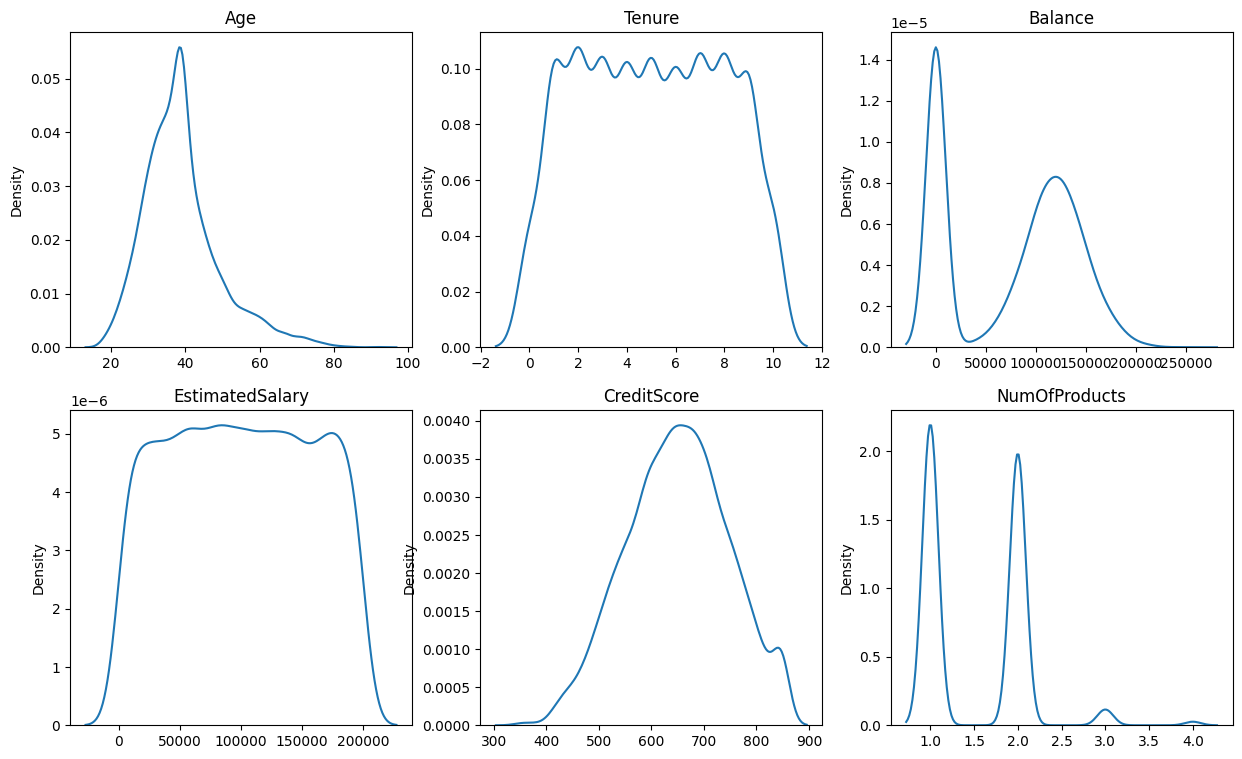

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
# Flatten the 2D axes array to 1D for easy indexing
axes_flat = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(data=df[col], ax=axes_flat[idx])
    axes_flat[idx].set_title(col)  # Use axes_flat[idx] consistently
    axes_flat[idx].set_xlabel('')  # Fixed typo: set_xlabel not set_xlable
    
plt.show()

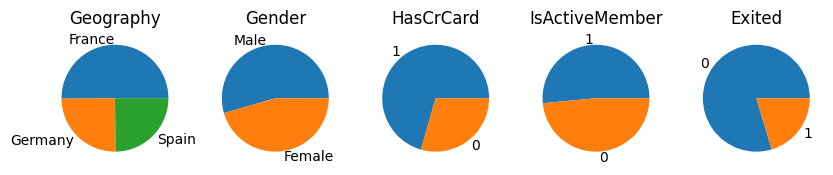

In [57]:
fig, axes = plt.subplots(1, 5, figsize=(10, 8))

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
        kind='pie',
        ax=axes[idx]
    )
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')  # Fixed typo: set_ylabel not set_ylable

plt.show()

#### 3.2 Box Plots

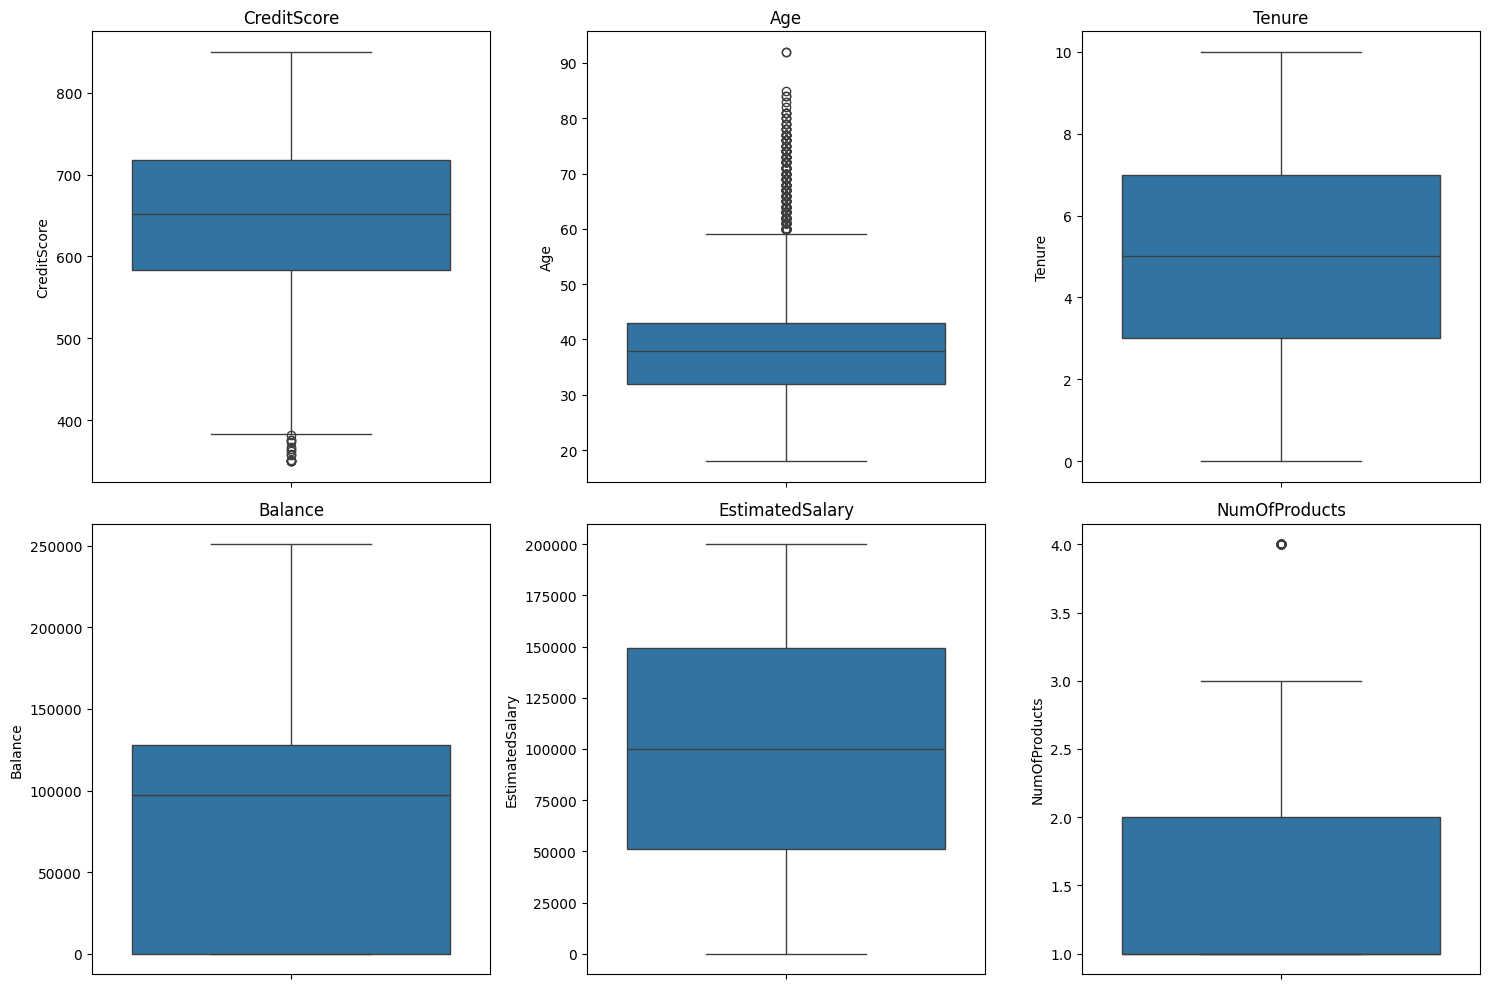

In [58]:
numerical_columns = ['Age','Tenure','Balance','EstimatedSalary','CreditScore','NumOfProducts']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(data=df, y='CreditScore', ax=axes[0,0])
axes[0,0].set_title('CreditScore')

sns.boxplot(data=df, y='Age', ax=axes[0,1])  # Fixed: was [0,2]
axes[0,1].set_title('Age')

sns.boxplot(data=df, y='Tenure', ax=axes[0,2])  # Fixed: was [0,2]
axes[0,2].set_title('Tenure')

sns.boxplot(data=df, y='Balance', ax=axes[1,0])  # Fixed: was [0,2]
axes[1,0].set_title('Balance')

sns.boxplot(data=df, y='EstimatedSalary', ax=axes[1,1])  # Fixed: was [1,2]
axes[1,1].set_title('EstimatedSalary')

sns.boxplot(data=df, y='NumOfProducts', ax=axes[1,2])
axes[1,2].set_title('NumOfProducts')

plt.tight_layout()
plt.show()

#### 3.3 Empirical Rule / 3-Sigma rule

In [59]:
def find_anomaly(data):
    mean = data.mean()
    std = data.std()
    
    upper_bound = mean + (3 * std)
    lower_bound = mean - (3 * std)
    
    return (data > upper_bound) | (data < lower_bound)

In [60]:
numerical_columns = ['Age','Tenure','Balance','EstimatedSalary','CreditScore']
for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outliers_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outliers_percentage*100}%)")

Age : 144 outliers (1.4000000000000001%)
Tenure : 0 outliers (0.0%)
Balance : 0 outliers (0.0%)
EstimatedSalary : 0 outliers (0.0%)
CreditScore : 8 outliers (0.1%)


#### 3.4 IQR Method

In [61]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    return (data > upper_bound) | (data < lower_bound)

In [62]:
numerical_columns = ['Age','Tenure','Balance','EstimatedSalary','CreditScore']
for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outliers_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outliers_percentage*100}%)")

Age : 501 outliers (5.0%)
Tenure : 0 outliers (0.0%)
Balance : 0 outliers (0.0%)
EstimatedSalary : 0 outliers (0.0%)
CreditScore : 15 outliers (0.2%)


In [63]:
# Get rows that have exactly 2 outlier features detected
outlier_mask_log = pd.DataFrame()
for col in numerical_columns:
    outlier_mask_log[col] = find_anomaly(df[col])
    
outlier_count = outlier_mask_log.sum(axis=1)
outlier_mask_log['Outlier Count'] = outlier_count
outlier_mask_log = outlier_mask_log[outlier_mask_log['Outlier Count'] == 2]
outlier_mask_log

,Age,Tenure,Balance,EstimatedSalary,CreditScore,Outlier Count
8762,True,False,False,False,True,2


In [64]:
df.to_csv(r'E:\Courses and Certifications\Zuu Crew\Building Production Ready ML Systems\Week 01\Data\Processed\ChurnModelling_Outliers_Handeled.csv',index=False)